In [1]:
import keras
from keras import Model
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, AveragePooling2D,GlobalAveragePooling2D,Input, BatchNormalization
from keras.callbacks import EarlyStopping
from keras.layers.merge import concatenate

In [57]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
np.random.seed(2)
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.callbacks import EarlyStopping

In [7]:
X = np.load("/kaggle/input/60x60-npy-dataset/pixel_value_array.npy")
Y = np.load("/kaggle/input/60x60-npy-dataset/label.npy")
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.2, random_state=7)
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.15, random_state=8)
del X
del Y

In [84]:
input_ = Input(shape = (60, 60, 3))
path_1 = Conv2D(filters=16, kernel_size=(1,1), activation='leaky_relu', padding="same")(input_)
path_1 = MaxPool2D(pool_size=(3,3), strides=(2,2))(path_1)
path_1 = Conv2D(filters=16, kernel_size=(5,5), activation='leaky_relu', padding="same")(path_1)
path_1 = MaxPool2D(pool_size=(3,3), strides=(2,2))(path_1)
path_1 = Conv2D(filters=32, kernel_size=(3,3), activation='leaky_relu', padding="same")(path_1)
path_1 = Conv2D(filters=32, kernel_size=(3,3), activation='leaky_relu', padding="same")(path_1)
path_1 = MaxPool2D(pool_size=(3,3), strides=(2,2))(path_1)

path_2 = Conv2D(filters=32, kernel_size=(1,1), activation='leaky_relu', padding="same")(input_)
path_2 = MaxPool2D(pool_size=(3,3), strides=(2,2))(path_2)
path_2 = Conv2D(filters=32, kernel_size=(5,5), activation='leaky_relu', padding="same")(path_2)
path_2 = MaxPool2D(pool_size=(3,3), strides=(2,2))(path_2)
path_2 = Conv2D(filters=64, kernel_size=(3,3), activation='leaky_relu', padding="same")(path_2)
path_2 = Conv2D(filters=64, kernel_size=(3,3), activation='leaky_relu', padding="same")(path_2)
path_2 = MaxPool2D(pool_size=(3,3), strides=(2,2))(path_2)

path_3 = MaxPool2D((3,3), strides=(1,1), padding='same')(input_)
path_3 = Conv2D(filters=8, kernel_size=(1,1), activation='leaky_relu', padding="same")(path_3)
path_3 = Conv2D(filters=16, kernel_size=(5,5), activation='leaky_relu', padding="same")(path_3)
path_3 = MaxPool2D(pool_size=(3,3), strides=(2,2))(path_3)
path_3 = Conv2D(filters=32, kernel_size=(3,3), activation='leaky_relu', padding="same")(path_3)
path_3 = MaxPool2D(pool_size=(6,6), strides=(4,4))(path_3)

output = keras.layers.concatenate([path_1, path_2, path_3], axis = 3)
output = Flatten()(output)
out = Dense(48, activation='leaky_relu')(output)
out = Dense(2, activation='softmax')(out)
model = Model(inputs = input_, outputs = out)
print(model.summary())

Model: "model_14"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_28 (InputLayer)           [(None, 60, 60, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_279 (Conv2D)             (None, 60, 60, 16)   64          input_28[0][0]                   
__________________________________________________________________________________________________
conv2d_283 (Conv2D)             (None, 60, 60, 32)   128         input_28[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_225 (MaxPooling2D (None, 29, 29, 16)   0           conv2d_279[0][0]                 
___________________________________________________________________________________________

In [69]:
model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy'])

In [70]:
early_stopping = EarlyStopping(monitor='val_loss',min_delta=0,patience=15,verbose=1,restore_best_weights=True, mode='min')

In [71]:
batch_size=150
epochs=50
history = model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs, 
          validation_data = (X_test, Y_test), verbose = 2, callbacks=[early_stopping])

Epoch 1/50
57/57 - 29s - loss: 0.5508 - accuracy: 0.7245 - val_loss: 0.5034 - val_accuracy: 0.7655
Epoch 2/50
57/57 - 28s - loss: 0.4852 - accuracy: 0.7860 - val_loss: 0.4447 - val_accuracy: 0.8123
Epoch 3/50
57/57 - 28s - loss: 0.4485 - accuracy: 0.8038 - val_loss: 0.3982 - val_accuracy: 0.8383
Epoch 4/50
57/57 - 27s - loss: 0.4290 - accuracy: 0.8118 - val_loss: 0.4199 - val_accuracy: 0.8257
Epoch 5/50
57/57 - 28s - loss: 0.4063 - accuracy: 0.8270 - val_loss: 0.4134 - val_accuracy: 0.8069
Epoch 6/50
57/57 - 28s - loss: 0.3759 - accuracy: 0.8407 - val_loss: 0.3541 - val_accuracy: 0.8564
Epoch 7/50
57/57 - 28s - loss: 0.3607 - accuracy: 0.8459 - val_loss: 0.3429 - val_accuracy: 0.8611
Epoch 8/50
57/57 - 27s - loss: 0.3466 - accuracy: 0.8511 - val_loss: 0.3405 - val_accuracy: 0.8591
Epoch 9/50
57/57 - 28s - loss: 0.3382 - accuracy: 0.8557 - val_loss: 0.3504 - val_accuracy: 0.8510
Epoch 10/50
57/57 - 28s - loss: 0.3290 - accuracy: 0.8555 - val_loss: 0.3425 - val_accuracy: 0.8524
Epoch 11/

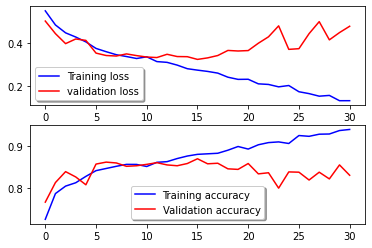

In [72]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [73]:
Y_pred = model.predict(X_val)
Y_pred_classes = np.argmax(Y_pred,axis = 1)
Y_true = np.argmax(Y_val,axis = 1)
print(confusion_matrix(Y_true, Y_pred_classes))

[[1257  243]
 [ 120  875]]


In [74]:
score = metrics.precision_score(Y_true,Y_pred_classes, average= "weighted")
print("Precision score: {}".format(score))
score = metrics.recall_score(Y_true, Y_pred_classes, average= "weighted")
print("Recall score: {}".format(score))
score_f1 = metrics.f1_score(Y_true, Y_pred_classes, average= "weighted")
print("F1 score: {}".format(score_f1))

Precision score: 0.8609280131462663
Recall score: 0.8545090180360722
F1 score: 0.8556335328744598
